In [16]:
import os
import numpy as np
from astropy.io import fits
import pylab as pl
from scipy import interpolate

In [2]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


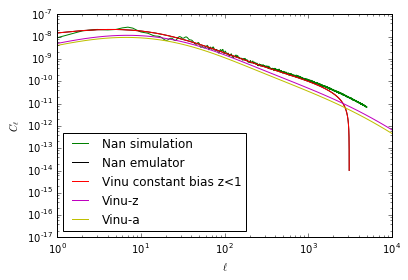

In [6]:
f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/new_kappa_srd.dat')
l = f[:,0]
cl = f[:,1] * 8
pl.loglog(l, cl, c='g', label='Nan simulation')

f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/psd_emulator.dat')
l = f[:,0]
cl = f[:,1]
pl.loglog(l, cl, c='k', label='Nan emulator')

f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/psd_emulator.dat')
l = f[:,0]
cl = f[:,1]
pl.loglog(l, cl, c='r', label='Vinu constant bias z<1')


f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_kk_z.dat')
l = f[:,0]
cl = f[:,3]
pl.loglog(l, cl, c='m', label='Vinu-z')

f = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_kk.dat')
#f = np.genfromtxt('../data/cl_kk.dat')
l = f[:,0]
cl = f[:,3]
pl.loglog(l, cl, c='y', label='Vinu-a')

pl.xlabel(r'$\ell$')
pl.ylabel(r'$C_\ell$')
pl.legend(loc=0)


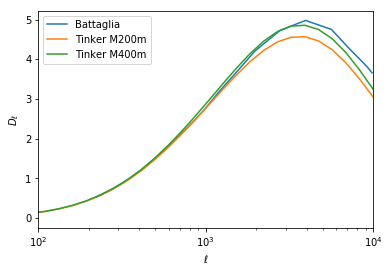

In [13]:
sf = fits.open('/media/luna1/flender/projects/gasmod/maps/OuterRim/cl_tsz150_Battaglia_c05_R13.fits')[1].data
l = np.arange(10000)
#pl.semilogx(l, l*(l+1)*sf['TEMPERATURE'][1:]/2./np.pi, label='Simulation')
b = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/battaglia_analytical.csv', delimiter=',')
pl.semilogx(b[:,0], b[:,1], label='Battaglia')
v2 = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_yy_virial_mf_200m.dat')
D2 =  v2[:,0]*(1.+v2[:,0])*v2[:,1]*1e12*6.7354/2./np.pi
pl.semilogx(v2[:,0], D2, label='Tinker M200m')
v4 = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_yy_virial_mf_400m.dat')
D4 =  v4[:,0]*(1.+v4[:,0])*v4[:,1]*1e12*6.7354/2./np.pi
pl.semilogx(v4[:,0], D4, label='Tinker M400m')
pl.xlim(100,10000)
pl.xlabel(r'$\ell$')
pl.ylabel(r'$D_\ell$')
pl.legend(loc=0)


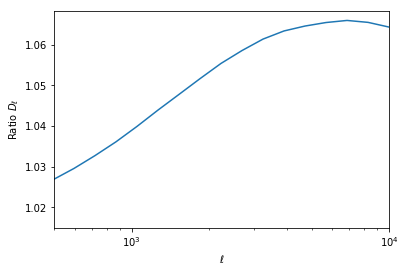

In [7]:
pl.semilogx(v4[:,0], D4/D2)
pl.xlim(500,10000)
pl.xlabel(r'$\ell$')
pl.ylabel(r'Ratio $D_\ell$')

In [4]:
files200m = ['../data/cl_yy_virial_z0p007_mf_200m.dat', '../data/cl_yy_virial_mf_200m.dat', '../data/cl_yy_m200c_mf_200m.dat']
labels = ['Virial z>0.007', 'Virial z>0.07', 'M200c']
files400m = ['../data/cl_yy_virial_z0p007_mf_400m.dat', '../data/cl_yy_virial_mf_400m.dat', '../data/cl_yy_m200c_mf_400m.dat']
labels = ['Virial z>0.007', 'Virial z>0.07', 'M200c']

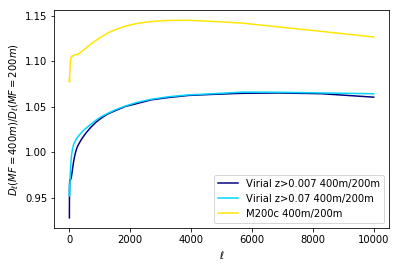

In [10]:
labels = ['Virial z>0.007 400m/200m', 'Virial z>0.07 400m/200m', 'M200c 400m/200m']
colors = pl.cm.jet(np.linspace(0, 1, len(files200m) + 1))
i = 0
for f2, f4 in zip(files200m, files400m):
    f = np.genfromtxt(f2)
    ellarr = f[:,0]
    cl200m = f[:,3] * 1e12 * ellarr * (ellarr+1) / 2. / np.pi
    f = np.genfromtxt(f4)
    ellarr = f[:,0]
    cl400m = f[:,3] * 1e12 * ellarr * (ellarr+1) / 2. / np.pi
    pl.plot(ellarr, cl400m/cl200m, label=labels[i], c=colors[i])
    i += 1
#pl.ylim([1.01, 1.07])
pl.xlabel(r'$\ell$')
pl.ylabel(r'$D_\ell(MF=400m)/D_\ell(MF=200m)$')
pl.legend(loc=0)

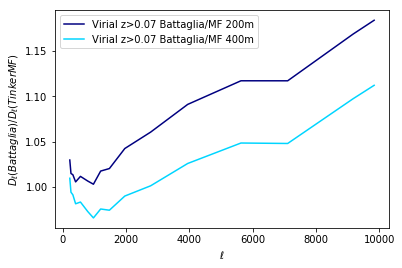

In [20]:
b = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/battaglia_analytical.csv', delimiter=',')
ellb = b[:,0]
Db = b[:,1]
v2 = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_yy_virial_mf_200m.dat')
D2 =  v2[:,0]*(1.+v2[:,0])*v2[:,1]*1e12*6.7354/2./np.pi
v4 = np.genfromtxt('/media/luna1/vinu/github/HaloModel/data/cl_yy_virial_mf_400m.dat')
D4 =  v4[:,0]*(1.+v4[:,0])*v4[:,1]*1e12*6.7354/2./np.pi

labels = ['Virial z>0.07 Battaglia/MF 200m', 'Virial z>0.07 Battaglia/MF 400m']
colors = pl.cm.jet(np.linspace(0, 1, len(files200m) + 1))

spl = interpolate.interp1d(v2[:,0], D2)
pl.plot(ellb, Db/spl(ellb), label=labels[0], c=colors[0])

spl = interpolate.interp1d(v4[:,0], D4)
pl.plot(ellb, Db/spl(ellb), label=labels[1], c=colors[1])

#pl.ylim([1.01, 1.07])
pl.xlabel(r'$\ell$')
pl.ylabel(r'$D_\ell(Battaglia)/D_\ell(Tinker MF)$')
pl.legend(loc=0)